# Ali Zahid Can B211210044

# https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data

# Makineleri öğrenme ve gelecek tahminleri için modeller üretme konusunda eğitme bilimi yaygın olarak kullanılmaktadır ve boşuna değildir. Tarım küresel ekonomide kritik bir rol oynamaktadır. İnsan nüfusunun sürekli artmasıyla birlikte, dünya çapındaki mahsul veriminin anlaşılması, gıda güvenliği sorunlarının çözümünde ve iklim değişikliğinin etkilerinin azaltılmasında merkezi bir öneme sahiptir.   
# Mahsul verimi tahmini önemli bir tarımsal sorundur. Tarımsal verim öncelikle hava koşullarına (yağmur, sıcaklık vb.), pestisitlere ve ürün veriminin geçmişine ilişkin doğru bilgilere bağlıdır, tarımsal risk yönetimi ve geleceğe yönelik tahminlerle ilgili kararların alınmasında önemli bir şeydir.

# Veri kümelerini yükleme ve okuma

## Gerekli kütüphaneler içe aktarıldıktan sonra dünya çapında en çok tüketilen 10 ürünün ürün verimi FAO web sitesinden indirildi. Toplanan veriler arasında ülke, ürün, 1961'den 2016'ya kadar olan yıl ve verim değeri yer alıyor.

In [1]:
#Kutuphaneleri ekliyoruz.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Google Drive'a baglaniyoruz.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [4]:
os.environ['KAGGLE_CONFIG_DIR']= "/content/gdrive/MyDrive/Colab Notebooks/input"

In [5]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"

/content/gdrive/MyDrive/Colab Notebooks/input


In [6]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/input


Kaggle'dan veri setini yüklüyoruz.

In [7]:
!kaggle datasets download -d patelris/crop-yield-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset
License(s): world-bank
  0% 0.00/959k [00:00<?, ?B/s]
100% 959k/959k [00:00<00:00, 63.0MB/s]


In [8]:
!ls

crop-yield-prediction-dataset.zip  pesticides.csv  rainfall.csv  temp.csv  yield.csv  yield_df.csv


In [9]:
!unzip \*zip && rm *zip

Archive:  crop-yield-prediction-dataset.zip
replace pesticides.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: pesticides.csv          
  inflating: rainfall.csv            
  inflating: temp.csv                
  inflating: yield.csv               
  inflating: yield_df.csv            


In [10]:
!ls

pesticides.csv	rainfall.csv  temp.csv	yield.csv  yield_df.csv


In [11]:
#veri kümelerini alma
pest_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/pesticides.csv')
rain_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/rainfall.csv')
temp_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/temp.csv')
yield_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/yield.csv')
data_frames=[pest_df,rain_df,temp_df,yield_df]

In [12]:
#beslenen tüm veri kümeleri için örnek bir satır kümesi okuma
for df in data_frames:
    print('A sample set of rows for {} is:\n'.format(df))
    display(df.sample(6))


A sample set of rows for               Domain      Area Element                Item  Year  \
0     Pesticides Use   Albania     Use  Pesticides (total)  1990   
1     Pesticides Use   Albania     Use  Pesticides (total)  1991   
2     Pesticides Use   Albania     Use  Pesticides (total)  1992   
3     Pesticides Use   Albania     Use  Pesticides (total)  1993   
4     Pesticides Use   Albania     Use  Pesticides (total)  1994   
...              ...       ...     ...                 ...   ...   
4344  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2012   
4345  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2013   
4346  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2014   
4347  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2015   
4348  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2016   

                              Unit    Value  
0     tonnes of active ingredients   121.00  
1     tonnes of active ingredients   121.00  
2     tonnes of acti

,Domain,Area,Element,Item,Year,Unit,Value
465,Pesticides Use,Bhutan,Use,Pesticides (total),2002,tonnes of active ingredients,1.40
1421,Pesticides Use,Finland,Use,Pesticides (total),1999,tonnes of active ingredients,1139.00
1399,Pesticides Use,Fiji,Use,Pesticides (total),2004,tonnes of active ingredients,596.41
2281,Pesticides Use,Lesotho,Use,Pesticides (total),2001,tonnes of active ingredients,0.30
3583,Pesticides Use,Spain,Use,Pesticides (total),2003,tonnes of active ingredients,41586.00
1849,Pesticides Use,Indonesia,Use,Pesticides (total),1995,tonnes of active ingredients,1597.00


A sample set of rows for              Area  Year average_rain_fall_mm_per_year
0     Afghanistan  1985                           327
1     Afghanistan  1986                           327
2     Afghanistan  1987                           327
3     Afghanistan  1989                           327
4     Afghanistan  1990                           327
...           ...   ...                           ...
6722     Zimbabwe  2013                           657
6723     Zimbabwe  2014                           657
6724     Zimbabwe  2015                           657
6725     Zimbabwe  2016                           657
6726     Zimbabwe  2017                           657

[6727 rows x 3 columns] is:



,Area,Year,average_rain_fall_mm_per_year
2516,Guinea,1991,1651
6598,Virgin Islands (U.S.),2013,NaN
4560,Norway,1989,1414
3935,Mauritania,2016,92
2077,Finland,1985,536
5713,St. Vincent and the Grenadines,1995,1583


A sample set of rows for        year        country  avg_temp
0      1849  Côte D'Ivoire     25.58
1      1850  Côte D'Ivoire     25.52
2      1851  Côte D'Ivoire     25.67
3      1852  Côte D'Ivoire       NaN
4      1853  Côte D'Ivoire       NaN
...     ...            ...       ...
71306  2009         Mexico     21.76
71307  2010         Mexico     20.90
71308  2011         Mexico     21.55
71309  2012         Mexico     21.52
71310  2013         Mexico     22.19

[71311 rows x 3 columns] is:



,year,country,avg_temp
38106,1775,Spain,11.93
46202,1875,United States,19.94
50814,1913,Montenegro,9.92
42017,1748,United States,NaN
13629,1854,United Kingdom,8.96
14298,1905,China,15.50


A sample set of rows for       Domain Code Domain  Area Code         Area  Element Code Element  \
0              QC  Crops          2  Afghanistan          5419   Yield   
1              QC  Crops          2  Afghanistan          5419   Yield   
2              QC  Crops          2  Afghanistan          5419   Yield   
3              QC  Crops          2  Afghanistan          5419   Yield   
4              QC  Crops          2  Afghanistan          5419   Yield   
...           ...    ...        ...          ...           ...     ...   
56712          QC  Crops        181     Zimbabwe          5419   Yield   
56713          QC  Crops        181     Zimbabwe          5419   Yield   
56714          QC  Crops        181     Zimbabwe          5419   Yield   
56715          QC  Crops        181     Zimbabwe          5419   Yield   
56716          QC  Crops        181     Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
0             56  Maize      

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
47221,QC,Crops,203,Spain,5419,Yield,15,Wheat,1988,1988,hg/ha,27852
21038,QC,Crops,84,Greece,5419,Yield,83,Sorghum,1998,1998,hg/ha,19251
5529,QC,Crops,20,Botswana,5419,Yield,83,Sorghum,1973,1973,hg/ha,1585
26894,QC,Crops,109,Jamaica,5419,Yield,27,"Rice, paddy",1972,1972,hg/ha,16100
10210,QC,Crops,351,China,5419,Yield,116,Potatoes,1988,1988,hg/ha,115177
53683,QC,Crops,234,Uruguay,5419,Yield,56,Maize,1983,1983,hg/ha,11140


# Özellik ve Null değer doldurma işlemlerini gerçekleştirme.

In [13]:
# Desenleri bulmada yardımcı olmayacak gereksiz sütunları düşürme.
pest_df=pest_df.drop(['Unit','Domain','Element','Item'],axis=1)
yield_df=yield_df.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Unit'],axis=1)
pest_df.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [14]:
yield_df.head()

,Area,Element,Item,Year,Value
0,Afghanistan,Yield,Maize,1961,14000
1,Afghanistan,Yield,Maize,1962,14000
2,Afghanistan,Yield,Maize,1963,14260
3,Afghanistan,Yield,Maize,1964,14257
4,Afghanistan,Yield,Maize,1965,14400


In [15]:
yield_df.columns

Index(['Area', 'Element', 'Item', 'Year', 'Value'], dtype='object')

In [16]:
rain_df.rename(columns = {' Area':'Area'},inplace = True)
for df in data_frames:
    print(df.columns)

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Index(['year', 'country', 'avg_temp'], dtype='object')
Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [17]:
temp_df.rename(columns = {'year':'Year','country':'Area'},inplace = True)
temp_df.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

In [18]:
# Veri setlerimizi tek bir veri çerçevesine birleştirme.
yield_df_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/yield_df.csv')
pr=pd.merge(pest_df,rain_df,on=['Year','Area'])
prt=pd.merge(pr,temp_df,on=['Year','Area'])
prty=pd.merge(yield_df,prt,on=['Year','Area'])
print(prty.columns)
prty.sample(10)

Index(['Area', 'Element', 'Item', 'Year', 'Value_x', 'Value_y',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


,Area,Element,Item,Year,Value_x,Value_y,average_rain_fall_mm_per_year,avg_temp
20902,Mozambique,Yield,Sweet potatoes,2005,71869,770.88,1032,22.27
2985,Brazil,Yield,"Rice, paddy",1994,23876,84312.78,1761,26.05
1334,Australia,Yield,Sorghum,2002,24561,26651.00,534,18.93
11415,India,Yield,Maize,1995,15946,61257.00,1083,25.73
12718,India,Yield,Sorghum,2002,7602,42482.56,1083,27.03
1951,Azerbaijan,Yield,Soybeans,2007,4000,148.68,447,12.75
9785,Guinea,Yield,Yams,2004,114162,327.49,1651,27.56
8132,Egypt,Yield,"Rice, paddy",1993,77184,4175.00,51,21.79
8739,Finland,Yield,Potatoes,2004,226886,1489.12,536,5.40
4268,Brazil,Yield,"Rice, paddy",2008,42311,312637.00,1761,27.54


In [19]:
prty.rename(columns={'Value_y':'pesticides_tonnes','Value_x':'hg/ha_yield'},inplace=True)
prty=prty.drop('Element',axis=1)
yield_df_df=yield_df_df.drop('Unnamed: 0',axis=1)
print(yield_df_df.columns)
print(prty.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


# Betimsel Veri Analizi

In [20]:
yield_df_df.shape,prty.shape

((28242, 7), (28248, 7))

In [21]:
prty.describe()

,Year,hg/ha_yield,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,77047.863282,37069.136973,20.543722
std,7.052997,84950.194454,59954.787836,6.311828
min,1990.000000,50.000000,0.040000,1.300000
25%,1995.000000,19918.750000,1695.710000,16.710000
50%,2001.000000,38295.000000,17517.760000,21.510000
75%,2008.000000,104598.250000,48687.880000,26.000000
max,2013.000000,501412.000000,367778.000000,30.650000


In [22]:
prty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28248 non-null  object 
 1   Item                           28248 non-null  object 
 2   Year                           28248 non-null  int64  
 3   hg/ha_yield                    28248 non-null  int64  
 4   pesticides_tonnes              28248 non-null  float64
 5   average_rain_fall_mm_per_year  28248 non-null  object 
 6   avg_temp                       28248 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


Buradaki Rainfall verisi Object veri tipindedir ancak integer (tam sayı) formatında olması istenmektedir.

In [23]:
prty.isnull().sum().sum()/prty.shape[0]

0.0

Veri setimizin çok küçük bir parçasında null değerler bulunması (%0,02 civarı), bu nedenle bu satırları silmeyi düşünebiliriz.

In [24]:
prty=prty.dropna()
prty.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
pesticides_tonnes                0
average_rain_fall_mm_per_year    0
avg_temp                         0
dtype: int64

In [25]:
#Rainfall verilerinin veri tipini istenilen bir tipe dönüştürme işlemi.
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].replace('..',np.nan)
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].astype('float')
prty=prty.dropna()
#Özellik ölçekleme ve Keşifsel Veri Analizi için faydalı olacak sayısal ve kategorik sütunları filtreleme.
num_cols = [i for i in prty.columns if (prty[i].dtype == 'float64' or prty[i].dtype == 'int64')]
cat_cols = [i for i in prty.columns if (i not in num_cols) and i != 'hg/ha_yield']
print(num_cols)
print(cat_cols)

['Year', 'hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']
['Area', 'Item']


# Veri Keşfi Analizi
# Bu noktadan itibaren, verilerimizdeki çeşitli desenlerin detaylı görsel analizine sahibiz. Birden fazla veri analitiği ve görselleştirme tekniği kullandık ve birçok bilgilendirici sonuçları çizdik! Gelecek, ilginç içgörüler için bekleyin!

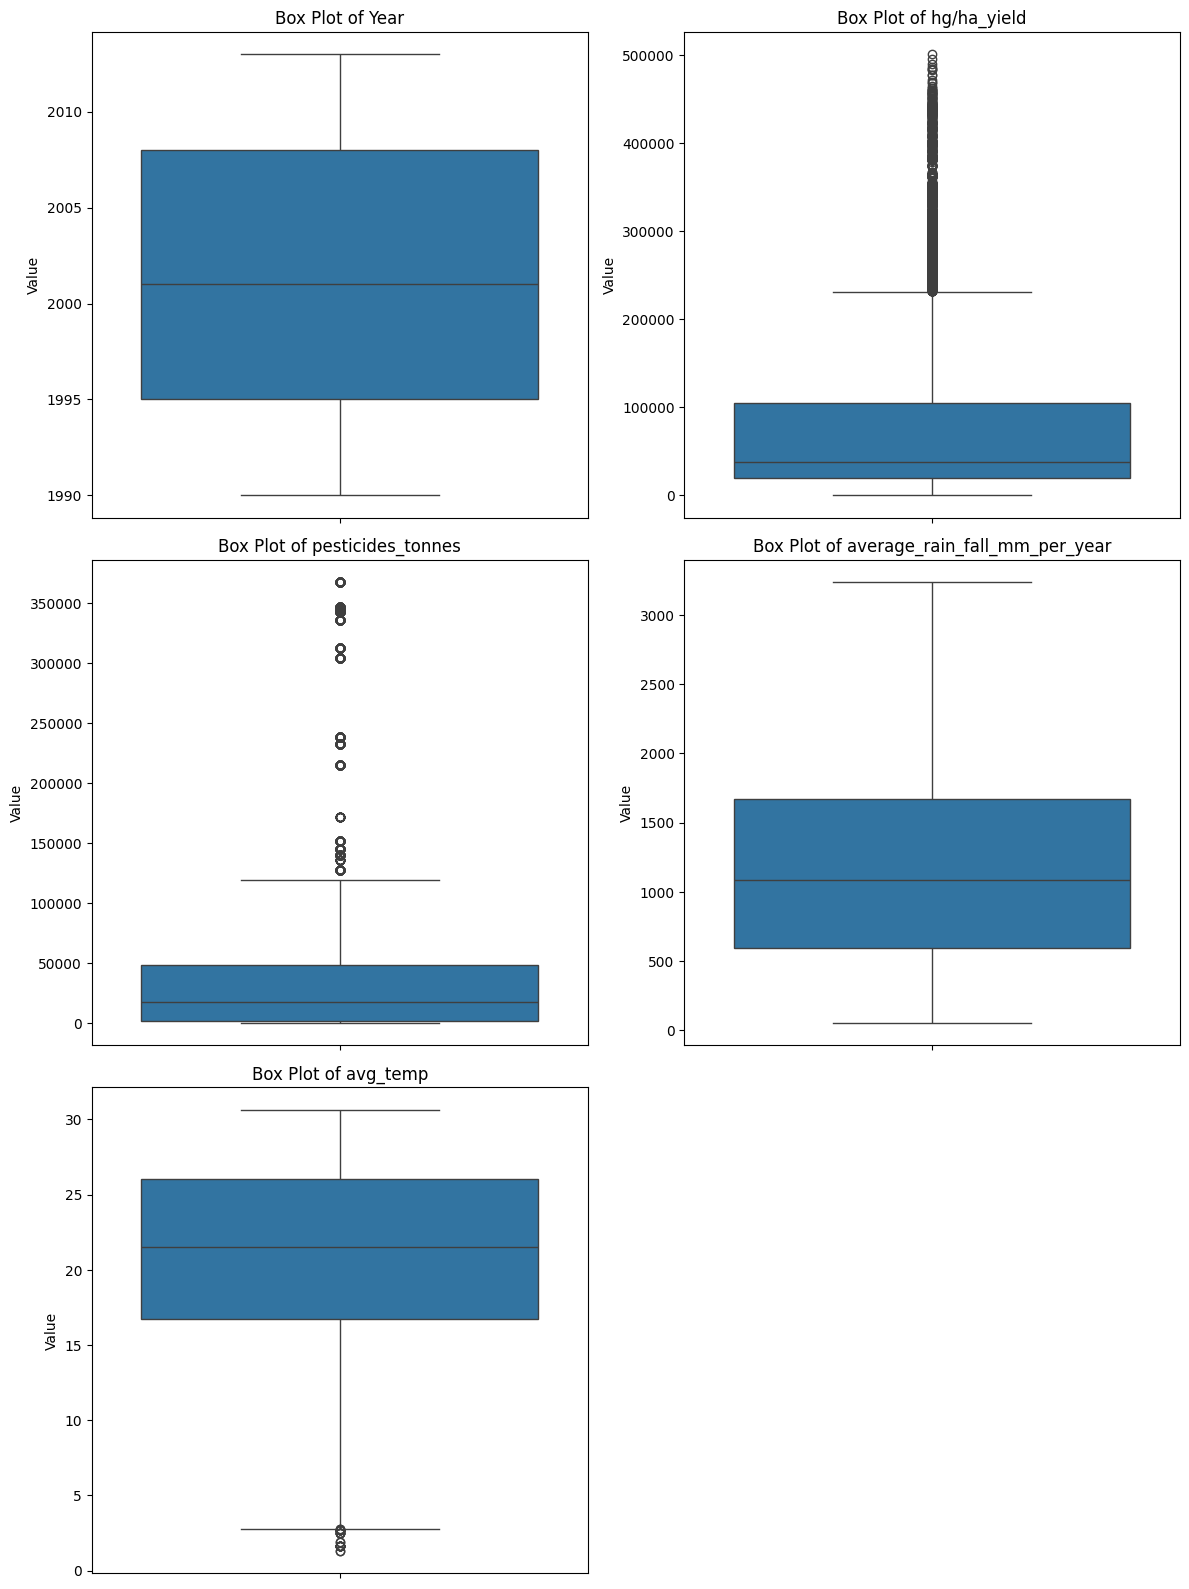

In [26]:
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=prty[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

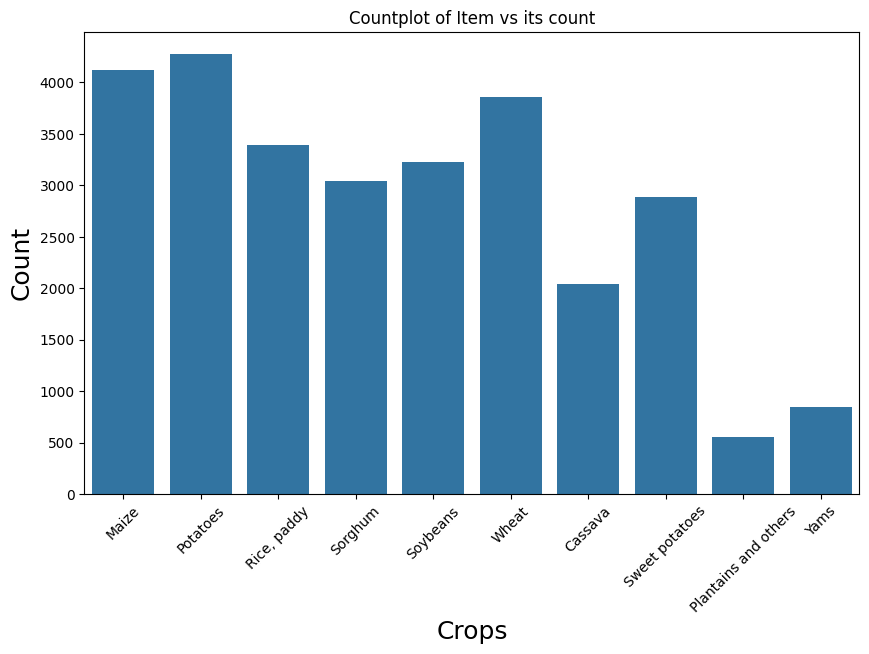

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item',data=prty)
plt.title('Countplot of Item vs its count')
plt.xlabel('Crops',fontsize=18,loc='center')
plt.ylabel('Count',fontsize=18,loc='center')
plt.xticks(rotation=45)
plt.show()

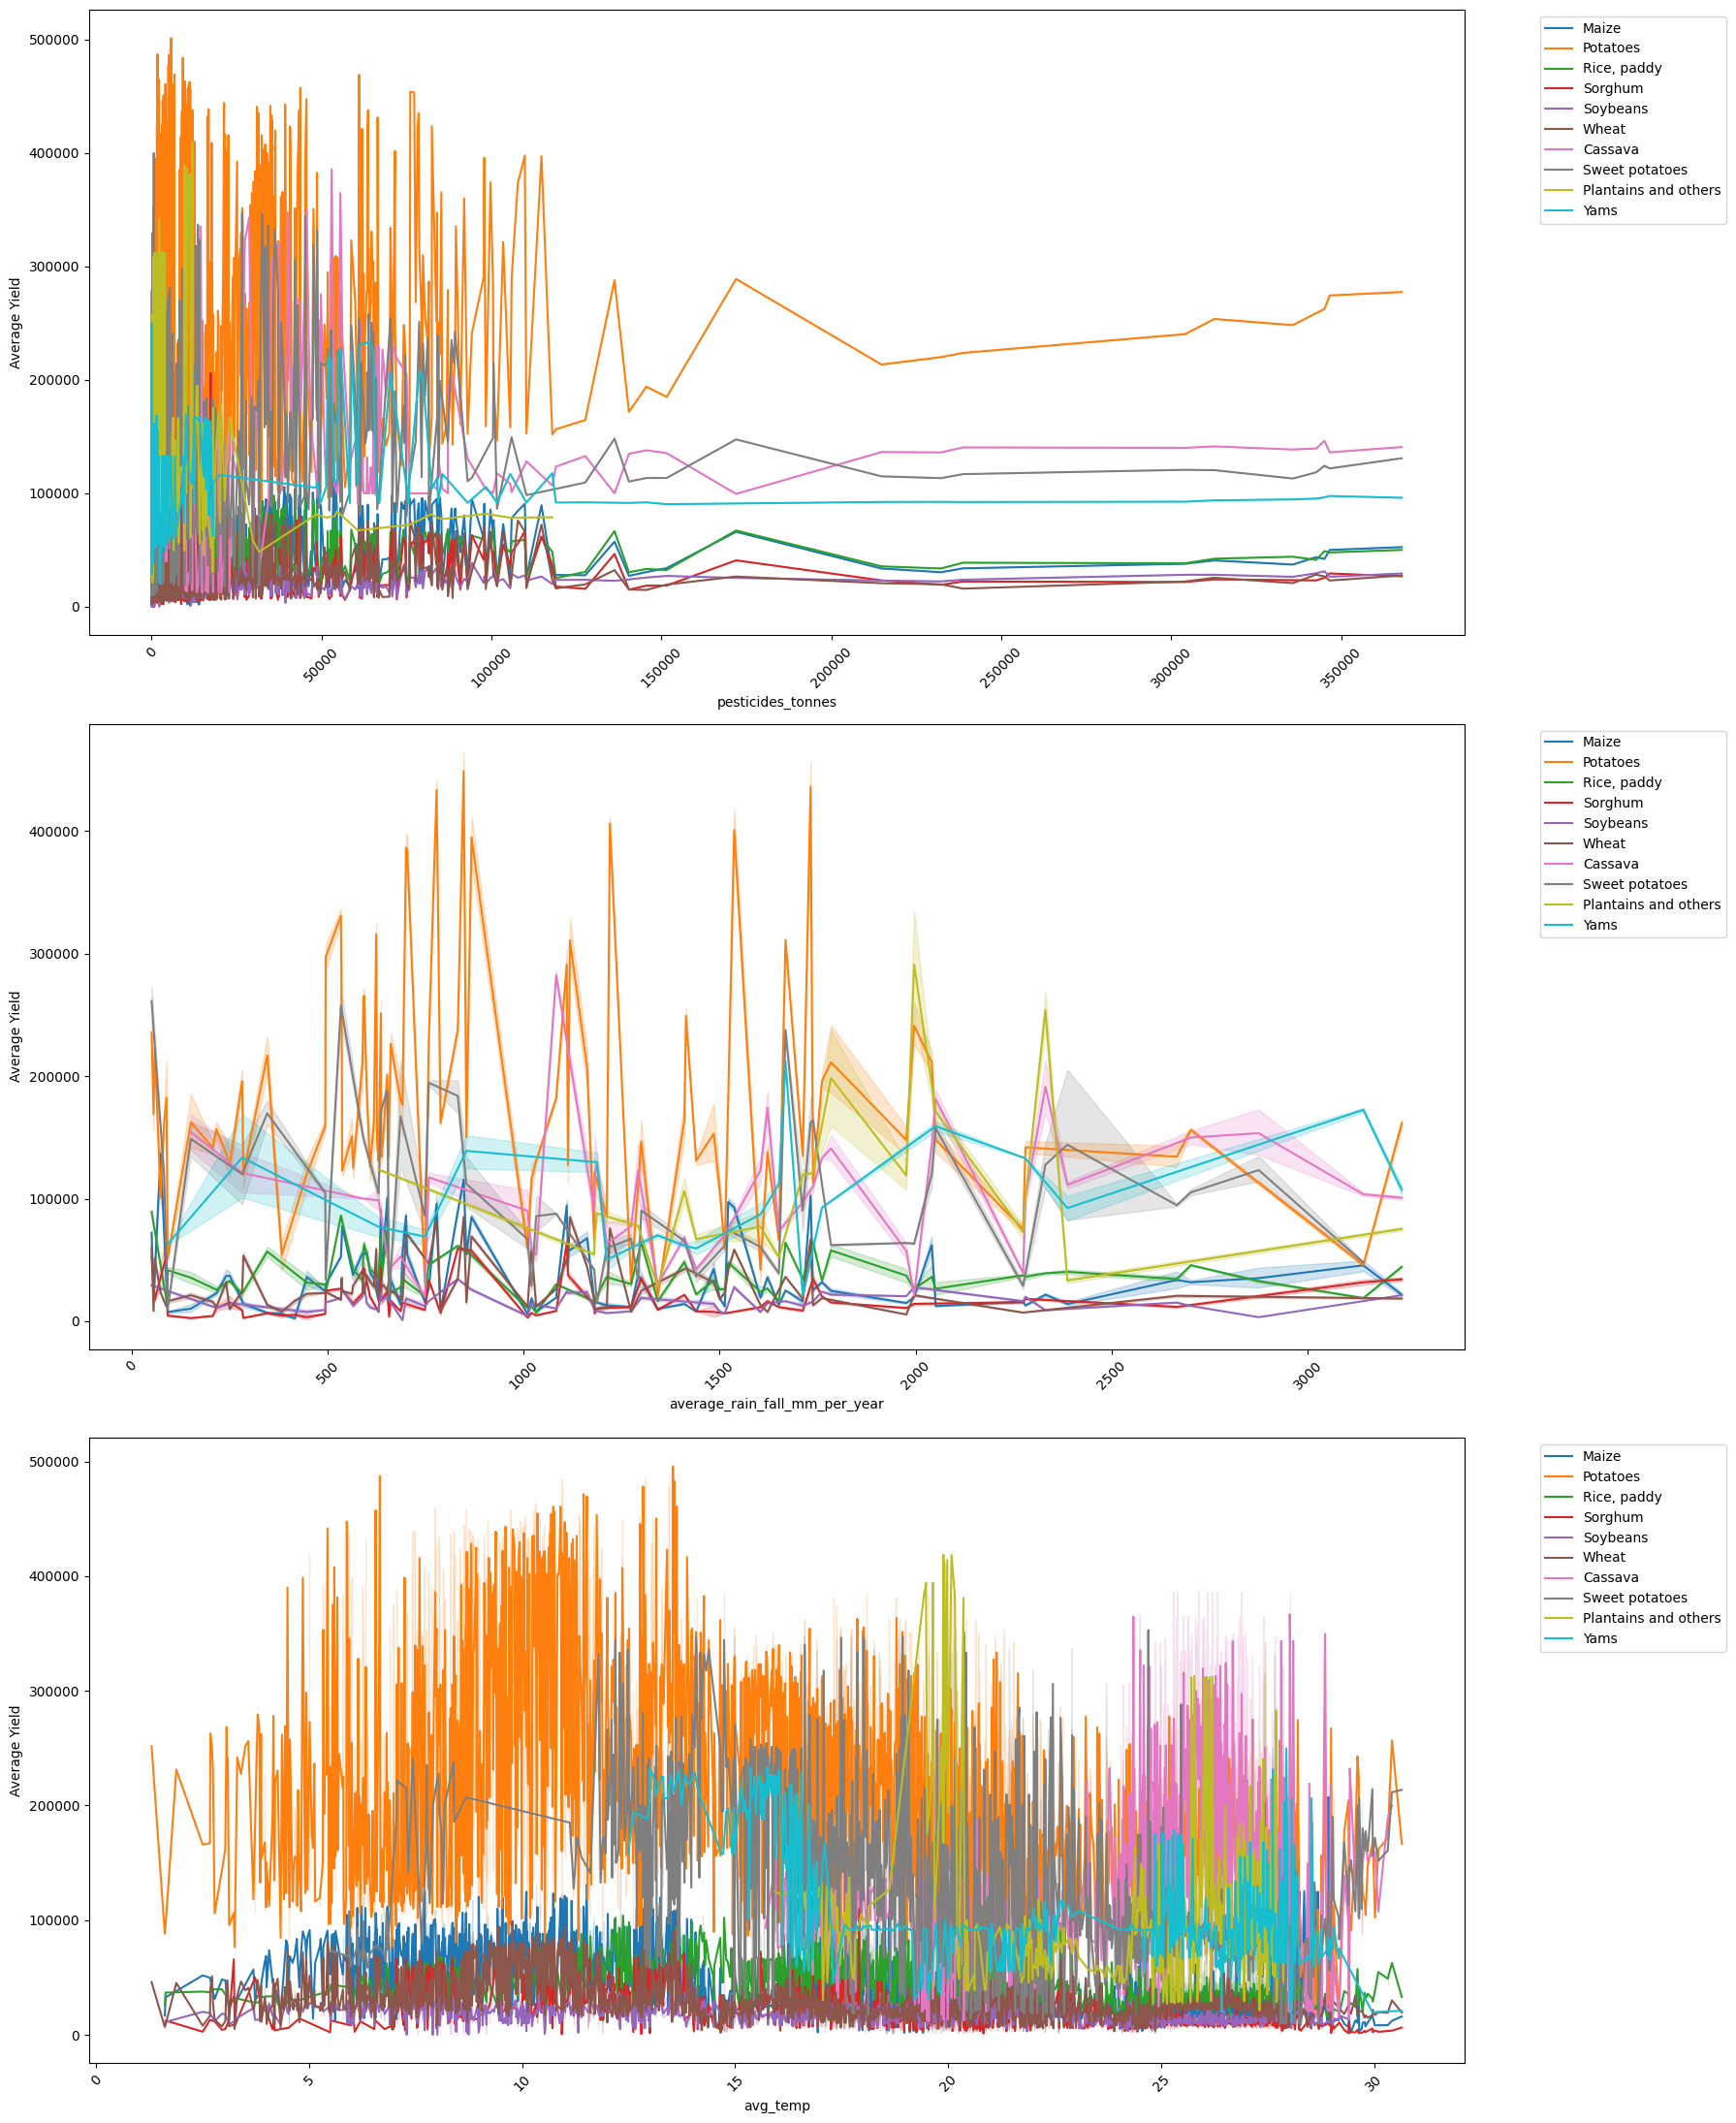

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(18, 22))
sns.lineplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[0], legend = True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[1], legend = True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[2], legend = True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

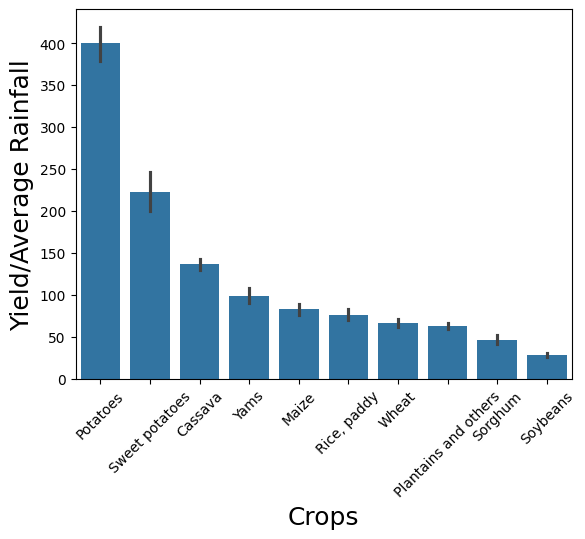

In [29]:
df=prty.copy()
df['yield_rainfall_ratio'] = df['hg/ha_yield'] / df['average_rain_fall_mm_per_year']

top_10_crops = df.groupby('Item')['yield_rainfall_ratio'].mean().sort_values(ascending=False).head(10).index

# Verileri filtreleyerek yalnızca en iyi 10 ürünü dahil edin
top_10_data = df[df['Item'].isin(top_10_crops)]

sns.barplot(data=top_10_data, x='Item', y='yield_rainfall_ratio', order=top_10_crops)
plt.xlabel('Crops',fontsize=18)
plt.ylabel('Yield/Average Rainfall',fontsize=18)
plt.xticks(rotation=45)
plt.show()

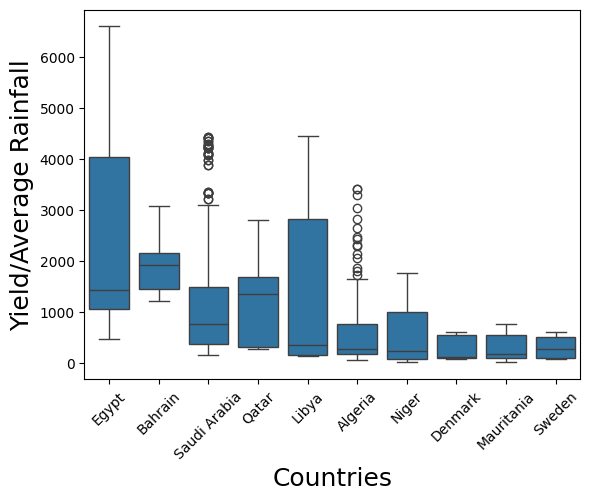

In [30]:
df=prty.copy()
df['yield_rainfall_ratio'] = df['hg/ha_yield'] / df['average_rain_fall_mm_per_year']

top_10_countries = df.groupby('Area')['yield_rainfall_ratio'].mean().sort_values(ascending=False).head(10).index
top_10_data = df[df['Area'].isin(top_10_countries)]

sns.boxplot(data=top_10_data, x='Area', y='yield_rainfall_ratio', order=top_10_countries)
plt.xlabel('Countries',fontsize=18)
plt.ylabel('Yield/Average Rainfall',fontsize=18)
plt.xticks(rotation=45)
plt.show()

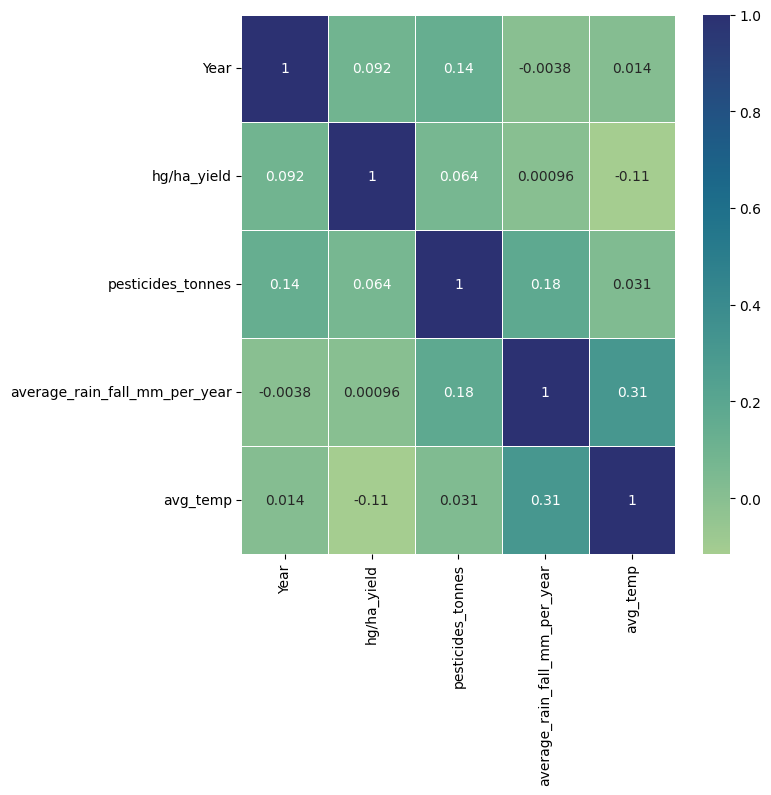

In [31]:
# Sayısal sütunları seçin
numeric_df = prty.select_dtypes(include=[float, int])

# Korelasyon matrisini hesaplayın
corr_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='crest')
plt.show()

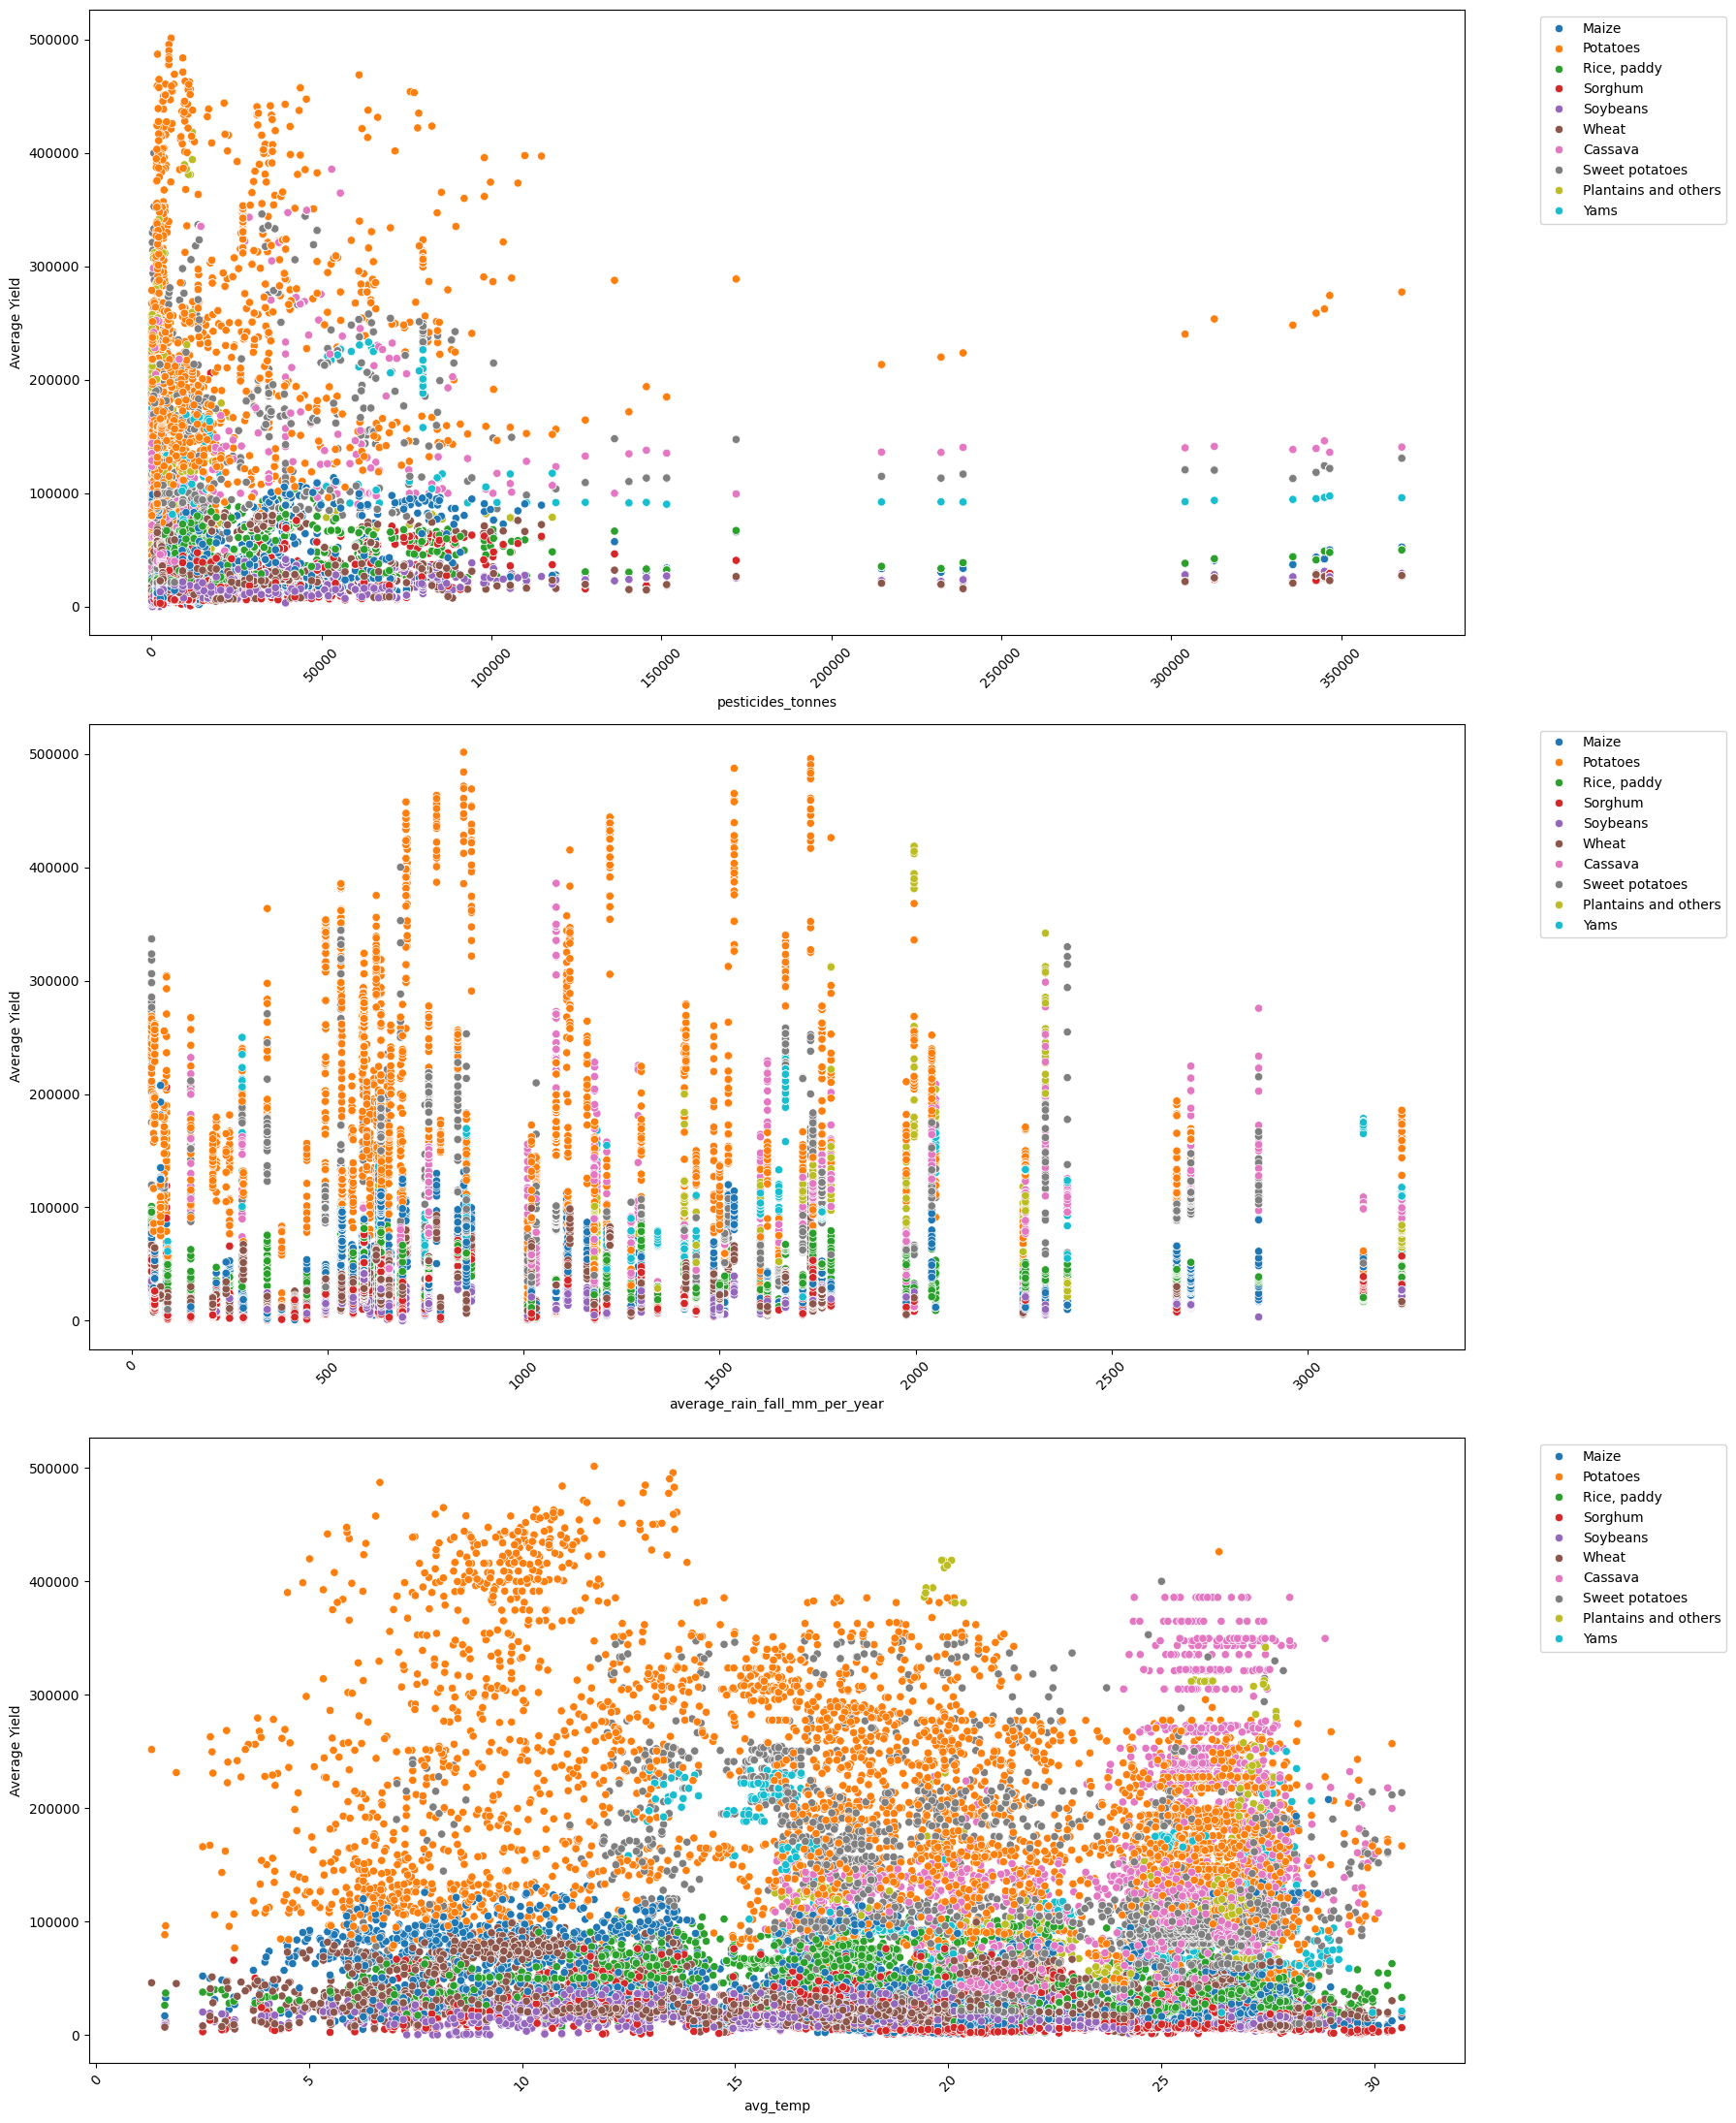

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[0], legend = True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[1], legend = True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[2], legend = True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
prty.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')

# **Veri On Islemede**

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Öncelikle, kategorik özellikler üzerinde one hot encoding gerçekleştirdik ve ardından tüm özellikler üzerinde standart ölçekleme yaptık.
prty=prty.drop('Year',axis=True)
X,y=prty.drop('hg/ha_yield',axis=1),prty['hg/ha_yield']
X = pd.get_dummies(X,columns = cat_cols, drop_first = True)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [35]:
X

array([[-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       ...,
       [-0.57585308, -0.69323228, -0.12399147, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.57585308, -0.69323228, -0.12399147, ...,  2.96180998,
        -0.39770719, -0.17583529],
       [-0.57585308, -0.69323228, -0.12399147, ..., -0.33763138,
         2.51441269, -0.17583529]])

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,shuffle=True)
print(X_train.shape,X_test.shape)

(22593, 112) (5649, 112)


# **İlk modelimizi oluşturma**

In [37]:
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

poly=PolynomialFeatures(degree=2,order='C',include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg=LinearRegression()
lin_reg.fit(X_train_poly,y_train)
y_pred=lin_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 358200028.2760389
R-squared: 0.9506181104253452


# **Birden fazla model deneme ve Hiperparametre Ayarlama**

In [38]:
model_names=['svm_regressor','random_forest_regressor','lasso_regressor','XGBoost_Regressor']

svr=SVR(kernel='rbf', gamma='auto')
random_forest=RandomForestRegressor()
lasso_regressor = Lasso(alpha=1.0, random_state=42,max_iter=3000)
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

models = [svr, random_forest, lasso_regressor, xgb_regressor]

model_params = [
    {},  # SVR hyperparametrelere ihtiyac duymuyor
    {'n_estimators': [10, 50, 100]},  # RandomForestRegressor parametreleri
    {'alpha': [0.1, 1.0, 10.0]},  # Lasso parametreleri
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}  # XGBRegressor parametreleri
]

In [39]:
# Burada, en iyi modeli bulmak için çoklu regresyon modelleri üzerinde hiperparametre ayarlaması yaptık.

scores = []
best_estimators = {}

for name, model, params in zip(model_names, models, model_params):
#     pipe = make_pipeline(StandardScaler(), model)
    clf = GridSearchCV(model, params, cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model] = clf.best_estimator_

res = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
res

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e+12, tolerance: 1.281e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e+12, tolerance: 1.324e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.079e+12, tolerance: 1.302e

,model,best_score,best_params
0,svm_regressor,-0.205069,{}
1,random_forest_regressor,0.973537,{'n_estimators': 100}
2,lasso_regressor,0.745383,{'alpha': 10.0}
3,XGBoost_Regressor,0.967150,"{'learning_rate': 0.5, 'n_estimators': 200}"


In [40]:
best_model=xgb.XGBRegressor(learning_rate=0.5,n_estimators=200)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9702086264590911


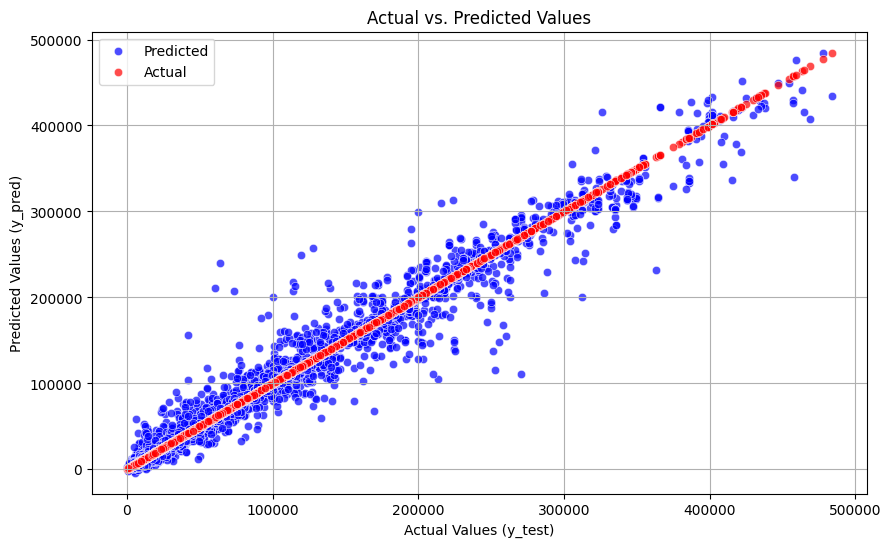

In [41]:
#Modelimizin sonuçlarını, orijinal sonuçlara karşı görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='red', label='Actual')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()